In [133]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix
%matplotlib inline
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [134]:
print(pd.options.display.max_rows)
print(pd.options.display.max_columns)

100
100


In [138]:
orig_data = pd.read_csv('./cumulative.csv', sep = ',', engine = 'python')
print(orig_data.shape)

(9564, 50)


"""
kepid:          KepID
kepoi_name:     KOI Name
kepler_name:    Kepler Name
koi_disposition: Exoplanet Archive Disposition
koi_pdisposition: Disposition Using Kepler Data
koi_score:      Disposition Score
koi_fpflag_nt:  Not Transit-Like False Positive Flag
koi_fpflag_ss:  Stellar Eclipse False Positive Flag
koi_fpflag_co:  Centroid Offset False Positive Flag
koi_fpflag_ec:  Ephemeris Match Indicates Contamination False Positive Flag
koi_period:     Orbital Period [days]
koi_period_err1: Orbital Period Upper Unc. [days]
koi_period_err2: Orbital Period Lower Unc. [days]
koi_time0bk:    Transit Epoch [BKJD]
koi_time0bk_err1: Transit Epoch Upper Unc. [BKJD]
koi_time0bk_err2: Transit Epoch Lower Unc. [BKJD]
koi_impact:     Impact Parameter
koi_impact_err1: Impact Parameter Upper Unc.
koi_impact_err2: Impact Parameter Lower Unc.
koi_duration:   Transit Duration [hrs]
koi_duration_err1: Transit Duration Upper Unc. [hrs]
koi_duration_err2: Transit Duration Lower Unc. [hrs]
koi_depth:      Transit Depth [ppm]
koi_depth_err1: Transit Depth Upper Unc. [ppm]
koi_depth_err2: Transit Depth Lower Unc. [ppm]
koi_prad:       Planetary Radius [Earth radii]
koi_prad_err1:  Planetary Radius Upper Unc. [Earth radii]
koi_prad_err2:  Planetary Radius Lower Unc. [Earth radii]
koi_teq:        Equilibrium Temperature [K]
koi_teq_err1:   Equilibrium Temperature Upper Unc. [K]
koi_teq_err2:   Equilibrium Temperature Lower Unc. [K]
koi_insol:      Insolation Flux [Earth flux]
koi_insol_err1: Insolation Flux Upper Unc. [Earth flux]
koi_insol_err2: Insolation Flux Lower Unc. [Earth flux]
koi_model_snr:  Transit Signal-to-Noise
koi_tce_plnt_num: TCE Planet Number
koi_tce_delivname: TCE Delivery
koi_steff:      Stellar Effective Temperature [K]
koi_steff_err1: Stellar Effective Temperature Upper Unc. [K]
koi_steff_err2: Stellar Effective Temperature Lower Unc. [K]
koi_slogg:      Stellar Surface Gravity [log10(cm/s**2)]
koi_slogg_err1: Stellar Surface Gravity Upper Unc. [log10(cm/s**2)]
koi_slogg_err2: Stellar Surface Gravity Lower Unc. [log10(cm/s**2)]
koi_srad:       Stellar Radius [Solar radii]
koi_srad_err1:  Stellar Radius Upper Unc. [Solar radii]
koi_srad_err2:  Stellar Radius Lower Unc. [Solar radii]
ra:             RA [decimal degrees]
dec:            Dec [decimal degrees]
koi_kepmag:     Kepler-band [mag]
"""

In [137]:
#original data without err attribute
new_columns_name = []
for column_name in orig_data.columns:
    if "err" not in column_name:
        continue
    new_columns_name.append(column_name)
data = orig_data.drop(columns=new_columns_name)
data
#map(lambda x: data.derop(),new_columns_name)

,loc_rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,170.538750,0.1460,2.95750,615.8,2.26,793.0,93.59,35.8,1.0,q1_q17_dr25_tce,5455.0,4.467,0.927,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,162.513840,0.5860,4.50700,874.8,2.83,443.0,9.11,25.8,2.0,q1_q17_dr25_tce,5455.0,4.467,0.927,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,19.899140,175.850252,0.9690,1.78220,10829.0,14.60,638.0,39.30,76.3,1.0,q1_q17_dr25_tce,5853.0,4.544,0.868,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,170.307565,1.2760,2.40641,8079.2,33.46,1395.0,891.96,505.6,1.0,q1_q17_dr25_tce,5805.0,4.564,0.791,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,171.595550,0.7010,1.65450,603.3,2.75,1406.0,926.16,40.9,1.0,q1_q17_dr25_tce,6031.0,4.438,1.046,288.75488,48.226200,15.509
5,6,10872983,K00756.01,Kepler-228 d,CONFIRMED,CANDIDATE,1.000,0,0,0,0,11.094321,171.201160,0.5380,4.59450,1517.5,3.90,835.0,114.81,66.5,1.0,q1_q17_dr25_tce,6046.0,4.486,0.972,296.28613,48.224670,15.714
6,7,10872983,K00756.02,Kepler-228 c,CONFIRMED,CANDIDATE,1.000,0,0,0,0,4.134435,172.979370,0.7620,3.14020,686.0,2.77,1160.0,427.65,40.2,2.0,q1_q17_dr25_tce,6046.0,4.486,0.972,296.28613,48.224670,15.714
7,8,10872983,K00756.03,Kepler-228 b,CONFIRMED,CANDIDATE,0.992,0,0,0,0,2.566589,179.554370,0.7550,2.42900,226.5,1.59,1360.0,807.74,15.0,3.0,q1_q17_dr25_tce,6046.0,4.486,0.972,296.28613,48.224670,15.714
8,9,6721123,K00114.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,0,7.361790,132.250530,1.1690,5.02200,233.7,39.21,1342.0,767.22,47.7,1.0,q1_q17_dr25_tce,6227.0,3.986,1.958,298.86435,42.151569,12.660
9,10,10910878,K00757.01,Kepler-229 c,CONFIRMED,CANDIDATE,1.000,0,0,0,0,16.068647,173.621937,0.0520,3.53470,4914.3,5.76,600.0,30.75,161.9,1.0,q1_q17_dr25_tce,5031.0,4.485,0.848,286.99948,48.375790,15.841


In [144]:
print(data.shape)

(9564, 28)


In [139]:
#data.head(10)

In [140]:
#data.tail(1)

In [141]:
data.columns

Index(['loc_rowid', 'kepid', 'kepoi_name', 'kepler_name', 'koi_disposition',
       'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss',
       'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_time0bk',
       'koi_impact', 'koi_duration', 'koi_depth', 'koi_prad', 'koi_teq',
       'koi_insol', 'koi_model_snr', 'koi_tce_plnt_num', 'koi_tce_delivname',
       'koi_steff', 'koi_slogg', 'koi_srad', 'ra', 'dec', 'koi_kepmag'],
      dtype='object')

In [142]:
#prefix 'koi_' in not needed
new_columns_name = []
for column_name in data.columns:
    if "koi_" in column_name:
        new_columns_name.append(column_name.replace("koi_",""))
        continue
    new_columns_name.append(column_name)   
data.columns = new_columns_name

In [143]:
data.columns

Index(['loc_rowid', 'kepid', 'kepoi_name', 'kepler_name', 'disposition',
       'pdisposition', 'score', 'fpflag_nt', 'fpflag_ss', 'fpflag_co',
       'fpflag_ec', 'period', 'time0bk', 'impact', 'duration', 'depth', 'prad',
       'teq', 'insol', 'model_snr', 'tce_plnt_num', 'tce_delivname', 'steff',
       'slogg', 'srad', 'ra', 'dec', 'kepmag'],
      dtype='object')

In [159]:
print(type(data['duration']))
print(type(data.duration))
pd.core.series.Series(data['duration'],range(0,10))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


0    2.95750
1    4.50700
2    1.78220
3    2.40641
4    1.65450
5    4.59450
6    3.14020
7    2.42900
8    5.02200
9    3.53470
Name: duration, dtype: float64

In [154]:
data[['score', 'duration']].head(1)

,score,duration
0,1.0,2.9575


In [155]:
print(data['duration'][3])
print(data['duration'].dtype)
print(type(data['duration'][3]))
print(type(data[['score', 'duration']]))

2.4064099999999997
float64
<class 'numpy.float64'>
<class 'pandas.core.frame.DataFrame'>


In [157]:
data.describe()

,loc_rowid,kepid,score,fpflag_nt,fpflag_ss,fpflag_co,fpflag_ec,period,time0bk,impact,duration,depth,prad,teq,insol,model_snr,tce_plnt_num,steff,slogg,srad,ra,dec,kepmag
count,9564.000000,9.564000e+03,8054.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9201.000000,9564.000000,9.201000e+03,9201.000000,9201.000000,9.243000e+03,9201.000000,9218.000000,9201.000000,9201.000000,9201.000000,9564.000000,9564.000000,9563.000000
mean,4782.500000,7.690628e+06,0.480829,0.208595,0.232748,0.197512,0.120033,75.671358,166.183251,0.735105,5.621606,2.379134e+04,102.891778,1085.385828,7.745737e+03,259.895001,1.243654,5706.823280,4.310157,1.728712,292.060163,43.810433,14.264606
std,2761.033321,2.653459e+06,0.476928,4.767290,0.422605,0.398142,0.325018,1334.744046,67.918960,3.348832,6.471554,8.224268e+04,3077.639126,856.351161,1.592047e+05,795.806615,0.664573,796.857947,0.432606,6.127185,4.766657,3.601243,1.385448
min,1.000000,7.574500e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.241843,120.515914,0.000000,0.052000,0.000000e+00,0.080000,25.000000,0.000000e+00,0.000000,1.000000,2661.000000,0.047000,0.109000,279.852720,36.577381,6.966000
25%,2391.750000,5.556034e+06,0.000000,0.000000,0.000000,0.000000,0.000000,2.733684,132.761718,0.197000,2.437750,1.599000e+02,1.400000,539.000000,2.015000e+01,12.000000,1.000000,5310.000000,4.218000,0.829000,288.660770,40.777173,13.440000
50%,4782.500000,7.906892e+06,0.334000,0.000000,0.000000,0.000000,0.000000,9.752831,137.224595,0.537000,3.792600,4.211000e+02,2.390000,878.000000,1.416000e+02,23.000000,1.000000,5767.000000,4.438000,1.000000,292.261125,43.677504,14.520000
75%,7173.250000,9.873066e+06,0.998000,0.000000,0.000000,0.000000,0.000000,40.715178,170.694603,0.889000,6.276500,1.473400e+03,14.930000,1379.000000,8.702900e+02,78.000000,1.000000,6112.000000,4.543000,1.345000,295.859160,46.714611,15.322000
max,9564.000000,1.293514e+07,1.000000,465.000000,1.000000,1.000000,1.000000,129995.778400,1472.522306,100.806000,138.540000,1.541400e+06,200346.000000,14667.000000,1.094755e+07,9054.700000,8.000000,15896.000000,5.364000,229.908000,301.720760,52.336010,20.003000


In [158]:
data['score'].describe()

count    8054.000000
mean        0.480829
std         0.476928
min         0.000000
25%         0.000000
50%         0.334000
75%         0.998000
max         1.000000
Name: score, dtype: float64

In [162]:
corr_mat = data.corr()
print(type(corr_mat))

<class 'pandas.core.frame.DataFrame'>


In [163]:
corr_mat

,loc_rowid,kepid,score,fpflag_nt,fpflag_ss,fpflag_co,fpflag_ec,period,time0bk,impact,duration,depth,prad,teq,insol,model_snr,tce_plnt_num,steff,slogg,srad,ra,dec,kepmag
loc_rowid,1.000000,0.021224,-0.454655,0.015537,0.160310,0.033354,0.071858,0.003541,0.073713,0.033465,0.158378,0.224717,0.028462,0.109275,0.026869,0.182419,-0.057856,0.138601,-0.153325,0.065765,0.042372,0.017805,-0.105312
kepid,0.021224,1.000000,0.095225,0.008139,-0.048630,-0.098636,-0.044213,0.011511,0.013620,0.000358,-0.026407,-0.017483,0.003681,-0.058705,-0.012403,0.000998,0.025220,-0.025494,0.052255,-0.027171,-0.002288,0.993587,0.017525
score,-0.454655,0.095225,1.000000,-0.006986,-0.556077,-0.510013,-0.398247,-0.070669,-0.008329,-0.214340,-0.173200,-0.301010,-0.076870,-0.302279,-0.030995,-0.269034,0.209081,-0.192544,0.150017,-0.071767,-0.168666,0.094944,0.042112
fpflag_nt,0.015537,0.008139,-0.006986,1.000000,-0.023270,-0.004575,0.000576,0.001554,0.016143,0.001844,0.015080,-0.005423,0.002195,-0.004703,-0.000075,-0.007878,-0.003074,0.001885,-0.001982,0.000393,0.012693,0.007914,-0.003753
fpflag_ss,0.160310,-0.048630,-0.556077,-0.023270,1.000000,0.151233,0.096539,-0.020557,-0.117435,0.042286,0.028321,0.426244,0.001396,0.204909,0.039564,0.437881,-0.182321,0.107830,-0.076140,0.047205,0.086374,-0.048116,0.000628
fpflag_co,0.033354,-0.098636,-0.510013,-0.004575,0.151233,1.000000,0.523851,-0.020804,-0.123592,0.005343,-0.046753,-0.125225,-0.012231,0.268092,0.023024,-0.127536,-0.132786,0.017717,-0.018899,0.041572,0.159923,-0.097175,0.060592
fpflag_ec,0.071858,-0.044213,-0.398247,0.000576,0.096539,0.523851,1.000000,-0.017021,-0.101114,-0.004968,0.018982,-0.086800,-0.010145,0.217612,0.030209,-0.089809,-0.095758,0.011633,0.002046,0.019290,0.070498,-0.045119,0.039075
period,0.003541,0.011511,-0.070669,0.001554,-0.020557,-0.020804,-0.017021,1.000000,0.095580,0.004928,0.037302,-0.009180,0.005135,-0.049097,-0.002603,-0.009614,-0.015107,-0.013552,0.001877,-0.000993,0.005670,0.011479,-0.009858
time0bk,0.073713,0.013620,-0.008329,0.016143,-0.117435,-0.123592,-0.101114,0.095580,1.000000,0.049241,0.216271,-0.051015,0.034992,-0.324462,-0.022279,-0.058781,0.003827,0.008367,-0.006220,-0.004924,-0.029615,0.012702,0.010124
impact,0.033465,0.000358,-0.214340,0.001844,0.042286,0.005343,-0.004968,0.004928,0.049241,1.000000,0.036955,0.005595,0.677380,-0.009982,-0.003659,-0.000476,-0.008040,0.016070,-0.059275,0.022645,0.022464,-0.001804,-0.009796


In [164]:
mask_ = corr_mat < 0.2
mask_

,loc_rowid,kepid,score,fpflag_nt,fpflag_ss,fpflag_co,fpflag_ec,period,time0bk,impact,duration,depth,prad,teq,insol,model_snr,tce_plnt_num,steff,slogg,srad,ra,dec,kepmag
loc_rowid,False,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True
kepid,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True
score,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True
fpflag_nt,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
fpflag_ss,True,True,True,True,False,True,True,True,True,True,True,False,True,False,True,False,True,True,True,True,True,True,True
fpflag_co,True,True,True,True,True,False,False,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True
fpflag_ec,True,True,True,True,True,False,False,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True
period,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
time0bk,True,True,True,True,True,True,True,True,False,True,False,True,True,True,True,True,True,True,True,True,True,True,True
impact,True,True,True,True,True,True,True,True,True,False,True,True,False,True,True,True,True,True,True,True,True,True,True


In [165]:
corr_mat.mask(mask_)

,loc_rowid,kepid,score,fpflag_nt,fpflag_ss,fpflag_co,fpflag_ec,period,time0bk,impact,duration,depth,prad,teq,insol,model_snr,tce_plnt_num,steff,slogg,srad,ra,dec,kepmag
loc_rowid,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.224717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
kepid,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.993587,NaN
score,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.209081,NaN,NaN,NaN,NaN,NaN,NaN
fpflag_nt,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fpflag_ss,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.426244,NaN,0.204909,NaN,0.437881,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fpflag_co,NaN,NaN,NaN,NaN,NaN,1.000000,0.523851,NaN,NaN,NaN,NaN,NaN,NaN,0.268092,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fpflag_ec,NaN,NaN,NaN,NaN,NaN,0.523851,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.217612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
period,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time0bk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.216271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
impact,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,NaN,NaN,0.67738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014F83C5C8D0>,
      dtype=object)

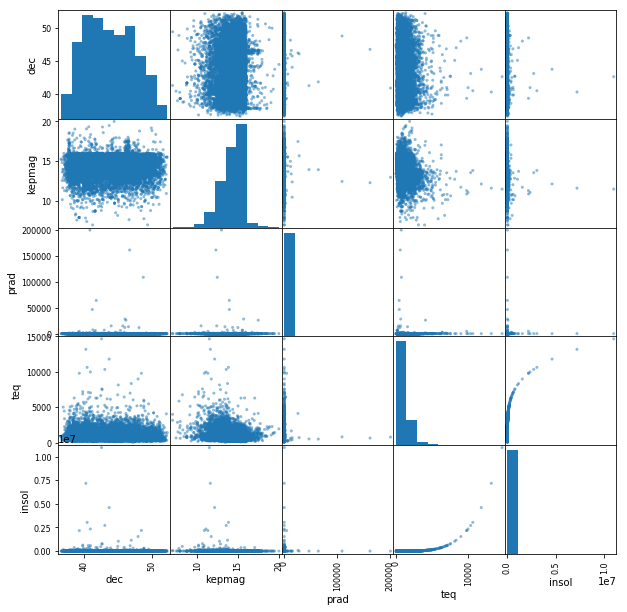

In [168]:
scatter_matrix(data[['dec','kepmag','prad','teq','insol']],figsize=(10,10))

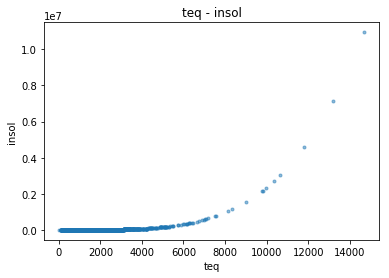

In [169]:
plt.plot(data['teq'], data['insol'], '.', alpha = 0.5)
plt.xlabel('teq')
plt.ylabel('insol')
plt.title('teq - insol')

pass

In [195]:
data[['prad']].describe()

,prad
count,9201.000000
mean,102.891778
std,3077.639126
min,0.080000
25%,1.400000
50%,2.390000
75%,14.930000
max,200346.000000


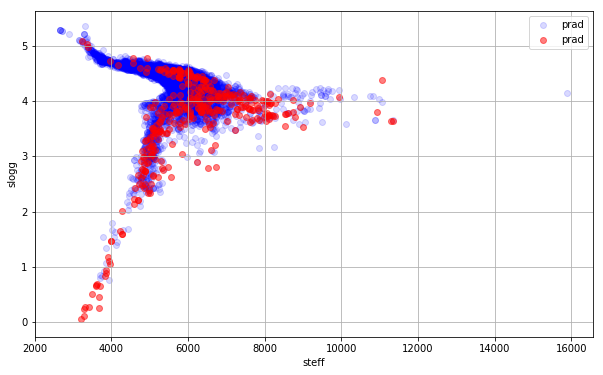

In [197]:
plt.figure(figsize = (10, 6))

plt.scatter(data[data['prad'] < 100 ]['steff'],
            data[data['prad'] < 100]['slogg'],
            alpha = 0.15,
            label = 'prad',
            color = 'b')

plt.scatter(data[data['prad'] > 100]['steff'],
            data[data['prad'] > 100]['slogg'],
            alpha = 0.5,
            label = 'prad',
            color = 'r')

plt.xlabel('steff')
#plt.xticks(range(18))
#plt.xlim(0.5, 2)
#plt.ylim(0,3)
plt.ylabel('slogg')
plt.legend()
plt.grid()

In [201]:
data.describe(include = ['object'])

,kepoi_name,kepler_name,disposition,pdisposition,tce_delivname
count,9564,2298,9564,9564,9218
unique,9564,2298,3,2,3
top,K07658.01,Kepler-1427 b,FALSE POSITIVE,FALSE POSITIVE,q1_q17_dr25_tce
freq,1,1,4840,4847,8054


In [202]:
data.describe(include = ['int64'])

,loc_rowid,kepid,fpflag_nt,fpflag_ss,fpflag_co,fpflag_ec
count,9564.000000,9.564000e+03,9564.000000,9564.000000,9564.000000,9564.000000
mean,4782.500000,7.690628e+06,0.208595,0.232748,0.197512,0.120033
std,2761.033321,2.653459e+06,4.767290,0.422605,0.398142,0.325018
min,1.000000,7.574500e+05,0.000000,0.000000,0.000000,0.000000
25%,2391.750000,5.556034e+06,0.000000,0.000000,0.000000,0.000000
50%,4782.500000,7.906892e+06,0.000000,0.000000,0.000000,0.000000
75%,7173.250000,9.873066e+06,0.000000,0.000000,0.000000,0.000000
max,9564.000000,1.293514e+07,465.000000,1.000000,1.000000,1.000000


In [203]:
data.describe(include = ['float64'])

,score,period,time0bk,impact,duration,depth,prad,teq,insol,model_snr,tce_plnt_num,steff,slogg,srad,ra,dec,kepmag
count,8054.000000,9564.000000,9564.000000,9201.000000,9564.000000,9.201000e+03,9201.000000,9201.000000,9.243000e+03,9201.000000,9218.000000,9201.000000,9201.000000,9201.000000,9564.000000,9564.000000,9563.000000
mean,0.480829,75.671358,166.183251,0.735105,5.621606,2.379134e+04,102.891778,1085.385828,7.745737e+03,259.895001,1.243654,5706.823280,4.310157,1.728712,292.060163,43.810433,14.264606
std,0.476928,1334.744046,67.918960,3.348832,6.471554,8.224268e+04,3077.639126,856.351161,1.592047e+05,795.806615,0.664573,796.857947,0.432606,6.127185,4.766657,3.601243,1.385448
min,0.000000,0.241843,120.515914,0.000000,0.052000,0.000000e+00,0.080000,25.000000,0.000000e+00,0.000000,1.000000,2661.000000,0.047000,0.109000,279.852720,36.577381,6.966000
25%,0.000000,2.733684,132.761718,0.197000,2.437750,1.599000e+02,1.400000,539.000000,2.015000e+01,12.000000,1.000000,5310.000000,4.218000,0.829000,288.660770,40.777173,13.440000
50%,0.334000,9.752831,137.224595,0.537000,3.792600,4.211000e+02,2.390000,878.000000,1.416000e+02,23.000000,1.000000,5767.000000,4.438000,1.000000,292.261125,43.677504,14.520000
75%,0.998000,40.715178,170.694603,0.889000,6.276500,1.473400e+03,14.930000,1379.000000,8.702900e+02,78.000000,1.000000,6112.000000,4.543000,1.345000,295.859160,46.714611,15.322000
max,1.000000,129995.778400,1472.522306,100.806000,138.540000,1.541400e+06,200346.000000,14667.000000,1.094755e+07,9054.700000,8.000000,15896.000000,5.364000,229.908000,301.720760,52.336010,20.003000


In [205]:
data.describe(include = 'all')

,loc_rowid,kepid,kepoi_name,kepler_name,disposition,pdisposition,score,fpflag_nt,fpflag_ss,fpflag_co,fpflag_ec,period,time0bk,impact,duration,depth,prad,teq,insol,model_snr,tce_plnt_num,tce_delivname,steff,slogg,srad,ra,dec,kepmag
count,9564.000000,9.564000e+03,9564,2298,9564,9564,8054.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9201.000000,9564.000000,9.201000e+03,9201.000000,9201.000000,9.243000e+03,9201.000000,9218.000000,9218,9201.000000,9201.000000,9201.000000,9564.000000,9564.000000,9563.000000
unique,NaN,NaN,9564,2298,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,K07658.01,Kepler-1427 b,FALSE POSITIVE,FALSE POSITIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,q1_q17_dr25_tce,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1,1,4840,4847,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8054,NaN,NaN,NaN,NaN,NaN,NaN
mean,4782.500000,7.690628e+06,NaN,NaN,NaN,NaN,0.480829,0.208595,0.232748,0.197512,0.120033,75.671358,166.183251,0.735105,5.621606,2.379134e+04,102.891778,1085.385828,7.745737e+03,259.895001,1.243654,NaN,5706.823280,4.310157,1.728712,292.060163,43.810433,14.264606
std,2761.033321,2.653459e+06,NaN,NaN,NaN,NaN,0.476928,4.767290,0.422605,0.398142,0.325018,1334.744046,67.918960,3.348832,6.471554,8.224268e+04,3077.639126,856.351161,1.592047e+05,795.806615,0.664573,NaN,796.857947,0.432606,6.127185,4.766657,3.601243,1.385448
min,1.000000,7.574500e+05,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.241843,120.515914,0.000000,0.052000,0.000000e+00,0.080000,25.000000,0.000000e+00,0.000000,1.000000,NaN,2661.000000,0.047000,0.109000,279.852720,36.577381,6.966000
25%,2391.750000,5.556034e+06,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,2.733684,132.761718,0.197000,2.437750,1.599000e+02,1.400000,539.000000,2.015000e+01,12.000000,1.000000,NaN,5310.000000,4.218000,0.829000,288.660770,40.777173,13.440000
50%,4782.500000,7.906892e+06,NaN,NaN,NaN,NaN,0.334000,0.000000,0.000000,0.000000,0.000000,9.752831,137.224595,0.537000,3.792600,4.211000e+02,2.390000,878.000000,1.416000e+02,23.000000,1.000000,NaN,5767.000000,4.438000,1.000000,292.261125,43.677504,14.520000
75%,7173.250000,9.873066e+06,NaN,NaN,NaN,NaN,0.998000,0.000000,0.000000,0.000000,0.000000,40.715178,170.694603,0.889000,6.276500,1.473400e+03,14.930000,1379.000000,8.702900e+02,78.000000,1.000000,NaN,6112.000000,4.543000,1.345000,295.859160,46.714611,15.322000


In [208]:
print(data['disposition'].unique())
print(data['pdisposition'].unique())

['CONFIRMED' 'CANDIDATE' 'FALSE POSITIVE']
['CANDIDATE' 'FALSE POSITIVE']


In [216]:
#np.set_printoptions(threshold=10)#np.nan
l = data['disposition'].unique()
print(l.size)
print(l)

3
['CONFIRMED' 'CANDIDATE' 'FALSE POSITIVE']


In [217]:
print(data['pdisposition'].unique())
print(len(data['pdisposition'].unique()))

['CANDIDATE' 'FALSE POSITIVE']
2


## Задача

# Подготовка данных
Предварительный анализ

In [219]:
s = set()
for column in data.columns:
    tp = data[column].dtype.name
    s.add(tp)
print(s)

{'int64', 'float64', 'object'}


In [220]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['kepoi_name', 'kepler_name', 'disposition', 'pdisposition', 'tce_delivname']
['loc_rowid', 'kepid', 'score', 'fpflag_nt', 'fpflag_ss', 'fpflag_co', 'fpflag_ec', 'period', 'time0bk', 'impact', 'duration', 'depth', 'prad', 'teq', 'insol', 'model_snr', 'tce_plnt_num', 'steff', 'slogg', 'srad', 'ra', 'dec', 'kepmag']


In [221]:
for c in categorical_columns:
    print(c, data[c].unique())

kepoi_name ['K00752.01' 'K00752.02' 'K00753.01' ... 'K04959.01' 'K03198.01'
 'K07814.01']
kepler_name ['Kepler-227 b' 'Kepler-227 c' nan ... 'Kepler-92 d' 'Kepler-1494 b'
 'Kepler-1600 b']
disposition ['CONFIRMED' 'CANDIDATE' 'FALSE POSITIVE']
pdisposition ['CANDIDATE' 'FALSE POSITIVE']
tce_delivname ['q1_q17_dr25_tce' 'q1_q16_tce' nan 'q1_q17_dr24_tce']


## Обрабатка пропущенных значений

In [223]:
column_with_skip = []
for n_c in numerical_columns:
    if True in np.isnan(data[n_c].tolist()):
        column_with_skip.append(n_c)
column_with_skip
#np.nan in data['score'].tolist()
#print(np.nan in data.iloc[24].tolist())
#type(data.iloc[24][3])

['score',
 'impact',
 'depth',
 'prad',
 'teq',
 'insol',
 'model_snr',
 'tce_plnt_num',
 'steff',
 'slogg',
 'srad',
 'kepmag']

In [224]:
data[column_with_skip].median(axis = 0)

score              0.334
impact             0.537
depth            421.100
prad               2.390
teq              878.000
insol            141.600
model_snr         23.000
tce_plnt_num       1.000
steff           5767.000
slogg              4.438
srad               1.000
kepmag            14.520
dtype: float64

In [225]:
data[numerical_columns].count(axis = 0)

loc_rowid       9564
kepid           9564
score           8054
fpflag_nt       9564
fpflag_ss       9564
fpflag_co       9564
fpflag_ec       9564
period          9564
time0bk         9564
impact          9201
duration        9564
depth           9201
prad            9201
teq             9201
insol           9243
model_snr       9201
tce_plnt_num    9218
steff           9201
slogg           9201
srad            9201
ra              9564
dec             9564
kepmag          9563
dtype: int64

In [226]:
data = data.fillna(data.median(axis = 0), axis = 0)

In [227]:
data[numerical_columns].count(axis = 0)

loc_rowid       9564
kepid           9564
score           9564
fpflag_nt       9564
fpflag_ss       9564
fpflag_co       9564
fpflag_ec       9564
period          9564
time0bk         9564
impact          9564
duration        9564
depth           9564
prad            9564
teq             9564
insol           9564
model_snr       9564
tce_plnt_num    9564
steff           9564
slogg           9564
srad            9564
ra              9564
dec             9564
kepmag          9564
dtype: int64

In [228]:
column_with_skip = []
for n_c in numerical_columns:
    if True in np.isnan(data[n_c].tolist()):
        column_with_skip.append(n_c)
column_with_skip
#np.nan in data['score'].tolist()
#print(np.nan in data.iloc[24].tolist())
#type(data.iloc[24][3])

[]

In [229]:
for i,f in enumerate(np.isnan(data[n_c].tolist())):
    if f is True:
        print(i)

In [230]:
orig_data.koi_disposition.count()

9564

In [231]:
data[categorical_columns].count(axis = 0)

kepoi_name       9564
kepler_name      2298
disposition      9564
pdisposition     9564
tce_delivname    9218
dtype: int64

In [232]:
data[categorical_columns].describe()

,kepoi_name,kepler_name,disposition,pdisposition,tce_delivname
count,9564,2298,9564,9564,9218
unique,9564,2298,3,2,3
top,K07658.01,Kepler-1427 b,FALSE POSITIVE,FALSE POSITIVE,q1_q17_dr25_tce
freq,1,1,4840,4847,8054


## Удаление ненужных данных

In [233]:
categorical_columns

['kepoi_name', 'kepler_name', 'disposition', 'pdisposition', 'tce_delivname']

kepoi_name is some identificator
tce_delivname is reference to other table wich contains information about Threshold-Crossing Event 

In [234]:
data = data.drop(columns=['kepoi_name','tce_delivname'])

In [235]:
data = data.drop(columns=['kepler_name'])

In [236]:
data.columns

Index(['loc_rowid', 'kepid', 'disposition', 'pdisposition', 'score',
       'fpflag_nt', 'fpflag_ss', 'fpflag_co', 'fpflag_ec', 'period', 'time0bk',
       'impact', 'duration', 'depth', 'prad', 'teq', 'insol', 'model_snr',
       'tce_plnt_num', 'steff', 'slogg', 'srad', 'ra', 'dec', 'kepmag'],
      dtype='object')

In [237]:
categorical_columns = data.describe(include = ['object']).columns.tolist()
categorical_columns

['disposition', 'pdisposition']

In [238]:
numerical_columns

['loc_rowid',
 'kepid',
 'score',
 'fpflag_nt',
 'fpflag_ss',
 'fpflag_co',
 'fpflag_ec',
 'period',
 'time0bk',
 'impact',
 'duration',
 'depth',
 'prad',
 'teq',
 'insol',
 'model_snr',
 'tce_plnt_num',
 'steff',
 'slogg',
 'srad',
 'ra',
 'dec',
 'kepmag']

loc_rowid and kepid is some identificator

In [240]:
data = data.drop(columns=['loc_rowid','kepid','tce_plnt_num'])

In [241]:
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']

## Векторизация


In [242]:
binary_columns    = [c for c in categorical_columns if data[c].unique().size == 2]
nonbinary_columns = [c for c in categorical_columns if data[c].unique().size > 2]
print(binary_columns, nonbinary_columns)

['pdisposition'] ['disposition']


In [243]:
print(data['pdisposition'].unique())
print(data['disposition'].unique())

['CANDIDATE' 'FALSE POSITIVE']
['CONFIRMED' 'CANDIDATE' 'FALSE POSITIVE']


In [258]:
data.at[data['pdisposition'] == 'CANDIDATE', 'pdisposition'] = 1
data.at[data['pdisposition'] == 'FALSE POSITIVE', 'pdisposition'] = 0
data['pdisposition'].describe()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops.py:1164: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


TypeError: invalid type comparison

In [259]:
data['disposition'].unique()

array(['CONFIRMED', 'CANDIDATE', 'FALSE POSITIVE'], dtype=object)

In [260]:
data_nonbinary = pd.get_dummies(data['disposition'])
print(data_nonbinary.columns)
data_nonbinary

Index(['CANDIDATE', 'CONFIRMED', 'FALSE POSITIVE'], dtype='object')


,CANDIDATE,CONFIRMED,FALSE POSITIVE
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,0,1,0
5,0,1,0
6,0,1,0
7,0,1,0
8,0,0,1
9,0,1,0


In [266]:
data = data.drop(columns='disposition')

## Нормализация количественных признаков

In [267]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,score,fpflag_nt,fpflag_ss,fpflag_co,fpflag_ec,period,time0bk,impact,duration,depth,prad,teq,insol,model_snr,tce_plnt_num,steff,slogg,srad,ra,dec,kepmag
count,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9.564000e+03,9564.000000,9564.000000,9.564000e+03,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000
mean,0.457647,0.208595,0.232748,0.197512,0.120033,75.671358,166.183251,0.727586,5.621606,2.290432e+04,99.077250,1077.514534,7.490517e+03,250.903691,1.234839,5709.107277,4.315009,1.701053,292.060163,43.810433,14.264633
std,0.440921,4.767290,0.422605,0.398142,0.325018,1334.744046,67.918960,3.284876,6.471554,8.079020e+04,3018.723391,840.875323,1.565158e+05,781.868222,0.654024,781.672343,0.425019,6.011383,4.766657,3.601243,1.385378
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.241843,120.515914,0.000000,0.052000,0.000000e+00,0.080000,25.000000,0.000000e+00,0.000000,1.000000,2661.000000,0.047000,0.109000,279.852720,36.577381,6.966000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,2.733684,132.761718,0.209075,2.437750,1.668000e+02,1.430000,553.000000,2.216000e+01,12.300000,1.000000,5333.000000,4.232750,0.835750,288.660770,40.777173,13.440000
50%,0.334000,0.000000,0.000000,0.000000,0.000000,9.752831,137.224595,0.537000,3.792600,4.211000e+02,2.390000,878.000000,1.416000e+02,23.000000,1.000000,5767.000000,4.438000,1.000000,292.261125,43.677504,14.520000
75%,0.995000,0.000000,0.000000,0.000000,0.000000,40.715178,170.694603,0.877000,6.276500,1.341775e+03,13.112500,1352.500000,8.067975e+02,71.125000,1.000000,6099.000000,4.539000,1.313000,295.859160,46.714611,15.322000
max,1.000000,465.000000,1.000000,1.000000,1.000000,129995.778400,1472.522306,100.806000,138.540000,1.541400e+06,200346.000000,14667.000000,1.094755e+07,9054.700000,8.000000,15896.000000,5.364000,229.908000,301.720760,52.336010,20.003000


In [268]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [269]:
data_numerical.describe()

,score,fpflag_nt,fpflag_ss,fpflag_co,fpflag_ec,period,time0bk,impact,duration,depth,prad,teq,insol,model_snr,tce_plnt_num,steff,slogg,srad,ra,dec,kepmag
count,9.564000e+03,9.564000e+03,9.564000e+03,9.564000e+03,9.564000e+03,9.564000e+03,9.564000e+03,9.564000e+03,9.564000e+03,9.564000e+03,9.564000e+03,9.564000e+03,9.564000e+03,9.564000e+03,9.564000e+03,9.564000e+03,9.564000e+03,9.564000e+03,9.564000e+03,9.564000e+03,9.564000e+03
mean,4.097222e-14,5.266036e-16,-1.107096e-14,-3.552249e-15,-6.287456e-15,-6.418114e-17,6.290927e-15,-4.954939e-16,-5.939357e-16,2.299023e-15,-3.581025e-16,1.589184e-16,-7.066259e-17,-6.018467e-16,-3.538598e-15,-1.993416e-16,7.038224e-14,-1.695923e-16,1.568794e-13,-2.039490e-14,2.715729e-14
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.037935e+00,-4.375541e-02,-5.507456e-01,-4.960827e-01,-3.693137e-01,-5.651234e-02,-6.723798e-01,-2.214958e-01,-8.606289e-01,-2.835037e-01,-3.279441e-02,-1.251689e+00,-4.785788e-02,-3.209028e-01,-3.590677e-01,-3.899469e+00,-1.004192e+01,-2.648398e-01,-2.561007e+00,-2.008488e+00,-5.268332e+00
25%,-1.037935e+00,-4.375541e-02,-5.507456e-01,-4.960827e-01,-3.693137e-01,-5.464544e-02,-4.920796e-01,-1.578481e-01,-4.919771e-01,-2.814391e-01,-3.234720e-02,-6.237721e-01,-4.771630e-02,-3.051712e-01,-3.590677e-01,-4.811572e-01,-1.935416e-01,-1.439442e-01,-7.131608e-01,-8.422814e-01,-5.952401e-01
50%,-2.804299e-01,-4.375541e-02,-5.507456e-01,-4.960827e-01,-3.693137e-01,-4.938664e-02,-4.263707e-01,-5.801936e-02,-2.826225e-01,-2.782915e-01,-3.202919e-02,-2.372701e-01,-4.695318e-02,-2.914861e-01,-3.590677e-01,7.406265e-02,2.893778e-01,-1.166210e-01,4.215995e-02,-3.691215e-02,1.843304e-01
75%,1.218705e+00,-4.375541e-02,-5.507456e-01,-4.960827e-01,-3.693137e-01,-2.618943e-02,6.642258e-02,4.548530e-02,1.011957e-01,-2.668956e-01,-2.847719e-02,3.270229e-01,-4.270315e-02,-2.299348e-01,-3.590677e-01,4.987930e-01,5.270142e-01,-6.455311e-02,7.969940e-01,8.064377e-01,7.632337e-01
max,1.230045e+00,9.749593e+01,1.815531e+00,2.015582e+00,2.707442e+00,9.733709e+01,1.923379e+01,3.046642e+01,2.053887e+01,1.879554e+01,6.633497e+01,1.616112e+01,6.989748e+01,1.125995e+01,1.034390e+01,1.303218e+01,2.468103e+00,3.796247e+01,2.026703e+00,2.367399e+00,4.142095e+00


## Соединяем все в одну таблицу

In [276]:
norm_data = pd.concat((data_numerical, data_nonbinary, data[binary_columns]), axis = 1)
print(norm_data.shape)
norm_data
#print data.columns

(9564, 24)


,score,fpflag_nt,fpflag_ss,fpflag_co,fpflag_ec,period,time0bk,impact,duration,depth,prad,teq,insol,model_snr,steff,slogg,srad,ra,dec,kepmag,CANDIDATE,CONFIRMED,FALSE POSITIVE,pdisposition
0,1.230045,-0.043755,-0.550746,-0.496083,-0.369314,-0.049585,0.064128,-0.177050,-0.411664,-0.275882,-0.032072,-0.338355,-0.047260,-0.275115,-0.325082,0.357610,-0.128765,-0.026420,1.202701,0.781279,0,1,0,1
1,1.159737,-0.043755,-0.550746,-0.496083,-0.369314,-0.015923,-0.054026,-0.043103,-0.172232,-0.272676,-0.031883,-0.754588,-0.047800,-0.287905,-0.325082,0.357610,-0.128765,-0.026420,1.202701,0.781279,0,1,0,1
2,-1.037935,-0.043755,-0.550746,-0.496083,-0.369314,-0.041785,0.142331,0.073492,-0.593274,-0.149465,-0.027984,-0.522687,-0.047607,-0.223316,0.184083,0.538778,-0.138579,1.037343,1.200612,0.845522,1,0,0,1
3,-1.037935,-0.043755,1.815531,-0.496083,-0.369314,-0.055392,0.060724,0.166951,-0.496820,-0.183502,-0.021737,0.377565,-0.042159,0.325753,0.122676,0.585835,-0.151388,-1.369000,1.242565,0.961735,0,0,1,0
4,1.230045,-0.043755,-0.550746,-0.496083,-0.369314,-0.054801,0.079688,-0.008094,-0.613007,-0.276036,-0.031910,0.390647,-0.041941,-0.268592,0.411800,0.289378,-0.108969,-0.693417,1.226179,0.898215,0,1,0,1
5,1.230045,-0.043755,-0.550746,-0.496083,-0.369314,-0.048382,0.073881,-0.057715,-0.158711,-0.264721,-0.031529,-0.288407,-0.047124,-0.235850,0.430990,0.402314,-0.121279,0.886568,1.225754,1.046189,0,1,0,1
6,1.230045,-0.043755,-0.550746,-0.496083,-0.369314,-0.053596,0.100062,0.010476,-0.383433,-0.275013,-0.031903,0.098095,-0.045126,-0.269487,0.430990,0.402314,-0.121279,0.886568,1.225754,1.046189,0,1,0,1
7,1.211901,-0.043755,-0.550746,-0.496083,-0.369314,-0.054771,0.196869,0.008345,-0.493329,-0.280700,-0.032294,0.335942,-0.042697,-0.301718,0.430990,0.402314,-0.121279,0.886568,1.225754,1.046189,0,1,0,1
8,-1.037935,-0.043755,1.815531,2.015582,-0.369314,-0.051178,-0.499606,0.134378,-0.092653,-0.280611,-0.019832,0.314536,-0.042956,-0.259895,0.662545,-0.774104,0.042743,1.427455,-0.460637,-1.158263,0,0,1,0
9,1.230045,-0.043755,-0.550746,-0.496083,-0.369314,-0.044655,0.109523,-0.205666,-0.322474,-0.222676,-0.030913,-0.567878,-0.047661,-0.113835,-0.867508,0.399961,-0.141906,-1.061684,1.267717,1.137861,0,1,0,1


# Создание тренировочной и тестовой выборки

In [278]:
X = data.drop(('pdisposition'), axis = 1) # выбрасываем столбец 'class'
y = data['pdisposition']
feature_names = X.columns
feature_names


Index(['score', 'fpflag_nt', 'fpflag_ss', 'fpflag_co', 'fpflag_ec', 'period',
       'time0bk', 'impact', 'duration', 'depth', 'prad', 'teq', 'insol',
       'model_snr', 'steff', 'slogg', 'srad', 'ra', 'dec', 'kepmag'],
      dtype='object')

In [279]:
type(feature_names)

pandas.core.indexes.base.Index

In [280]:
print(X.shape)
print(y.shape)
N, d = X.shape

(9564, 20)
(9564,)


In [281]:
type(X)

pandas.core.frame.DataFrame

In [282]:
type(y)

pandas.core.series.Series

In [284]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

6694 2870


В библиотеке scikit-learn реализована масса алгоритмов машинного обучения.

#### Некоторые алгоритмы машинного обучения, реализованные в scikit-learn:

 Метод                                     |  Класс
-------------------------------------------|--------------------------------------------         
 kNN – $k$ ближайших соседей               | `sklearn.neighbors.KNeighborsClassifier`
 LDA – линейный дискриминантный анализ     | `sklearn.discriminant_analysis.LinearDiscriminantAnalysis`
 QDA – квадратичный дискриминантный анализ | `sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis`
 Logistic – логистическая регрессия        | `sklearn.linear_model.LogisticRegression`
 SVC – машина опорных векторов             | `sklearn.svm.SVC`
 Tree – деревья решений                    | `sklearn.tree.DecisionTreeClassifier`
 RF – случайный лес                        | `sklearn.ensemble.RandomForestClassifier`
 ExtrRF – экстремально случайный лес       | ` `
 AdaBoost – алгоритм AdaBoost              | `sklearn.ensemble.AdaBoostClassifier`
 GBT – градиентный бустинг деревьев решений| `sklearn.ensemble.GradientBoostingClassifier`
 Нейронные сети                            | ` `
 



#### Основные методы классов, реализующих алгоритмы машинного обучения
Все алгоритмы выполнены в виде классов, обладающих по крайней мере следующими методами:



   Метод класса            |  Описание     
 --------------------------|-------------------------------------------------------------
  `fit(X_train, y_train)`              |  обучение (тренировка) модели на обучающей выборке `X_train`, `y_train`
  `predict(X)`             |  предсказание на данных `X`
  `set_params(**params)`   |  установка параметров алгоритма
  `get_params()`           |  чтение параметров алгоритма
 
 Заметим, что параметры алгоритмов обучения можно задавать как в конструкторе класса, так и с помощью метода `set_params(**params)`.
 
 #### Таблица наличия/отсутствия методов для основных алгоритмов машинного обучения:
 
    
   Методы класса               | kNN | LDA | QDA | Logistic | SVC | Tree | RF | AdaBoost | GBT     
 ------------------------------|-----|-----|-----|----------|-----|------|----|----------|------
  `fit(X, y)`                  |  +  |  +  |  +  |    +     |  +  |  +   | +  |    +     |  +
  `predict(X)`                 |  +  |  +  |  +  |    +     |  +  |  +   | +  |    +     |  +
  `predict_proba(X)`           |  +  |  +  |  +  |    +     |     |  +   | +  |    +     |  +
  `predict_log_proba(X)`       |     |  +  |  +  |    +     |     |  +   | +  |    +     |  +
  `score(X, y)`                |  +  |  +  |  +  |    +     |  +  |  +   | +  |    +     |  +
  `decision_function(X)`       |     |  +  |  +  |    +     |  +  |      |    |    +     |  +
  `transform(X)`               |     |  +  |     |    +     |     |  +   | +  |          |  +
  `staged_decision_function(X)`|     |     |     |          |     |      |    |    +     |  +    
  `staged_predict(X)`          |     |     |     |          |     |      |    |    +     |  +
  `staged_predict_proba(X)`    |     |     |     |          |     |      |    |    +     |  +
  `staged_score(X, y)`         |     |     |     |          |     |      |    |    +     |  +
  `set_params(**params)`       |  +  |  +  |  +  |    +     |  +  |  +   | +  |    +     |  +
  `get_params()`               |  +  |  +  |  +  |    +     |  +  |  +   | +  |    +     |  +
    
    

# $k$NN

In [286]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
#knn.set_params(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [287]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.2160143412010756 0.24425087108013938


In [288]:
err_test = 1 - knn.score(X_test, y_test) # Другой способ

In [289]:
err_test

0.24425087108013932

In [290]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[1096  371]
 [ 330 1073]]


In [291]:
confusion_matrix([0,1,0,1,0], [0,1,0,0,0])

array([[3, 0],
       [1, 1]], dtype=int64)

### Подбор параметров

In [292]:
# Долго!
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.24887959366596957 20


In [293]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.23438900507917537 0.23658536585365852


# SVC

In [294]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print(err_train, err_test)

0.00029877502240812666 0.4881533101045296


### Подбор параметров

In [ ]:
from sklearn.grid_search import GridSearchCV
Cs = 10.**np.arange(-5, 5)
gamma_array = 10.**np.arange(-5, 5)
svc = SVC()
grid = GridSearchCV(svc, param_grid = {'C': Cs, 'gamma': gamma_array})
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_C = grid.best_estimator_.C
print(best_cv_err, best_C)

In [ ]:
svc = SVC(C = best_C).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

# Random Forest

In [ ]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

### Значимость признаков

In [81]:
a=[1,2,5,70,32,3,4,7,234, 3]
a[-1:3:-1]

[3, 234, 7, 4, 3, 32]

In [82]:
np.sum(rf.feature_importances_)

0.99999999999999967

In [83]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(d):
    print("%2d. feature '%5s' (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))   

Feature ranking:
 1. feature 'fnlwgt' (0.206736)
 2. feature '  age' (0.183969)
 3. feature 'education-num' (0.135674)
 4. feature 'hours-per-week' (0.100523)
 5. feature 'marital-status_Married-civ-spouse' (0.071025)
 6. feature 'relationship_Husband' (0.047541)
 7. feature 'marital-status_Never-married' (0.024367)
 8. feature 'occupation_Exec-managerial' (0.021841)
 9. feature '  sex' (0.013883)
10. feature 'occupation_Prof-specialty' (0.012760)
11. feature 'workclass_Private' (0.011500)
12. feature 'relationship_Not-in-family' (0.011351)
13. feature 'relationship_Wife' (0.010969)
14. feature 'occupation_Other-service' (0.009693)
15. feature 'workclass_Self-emp-not-inc' (0.009357)
16. feature 'relationship_Own-child' (0.009145)
17. feature 'workclass_Self-emp-inc' (0.007903)
18. feature 'race_White' (0.007806)
19. feature 'occupation_Sales' (0.007469)
20. feature 'marital-status_Divorced' (0.007117)
21. feature 'occupation_Craft-repair' (0.007087)
22. feature 'workclass_Local-gov' (0

In [84]:
feature_names[[1,0,1]]

Index(['fnlwgt', 'age', 'fnlwgt'], dtype='object')

(-1, 20)

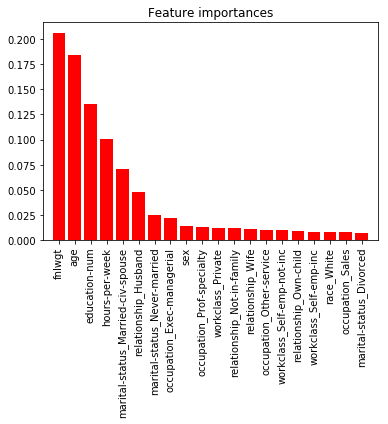

In [85]:
d_first = 20
plt.title("Feature importances")
plt.bar(range(d_first), importances[indices[:d_first]], align = 'center', color = 'r')
plt.xticks(range(d_first), feature_names[indices[:d_first]], rotation = 90)
plt.xlim([-1, d_first])

Использование только признаков
`age`, `hourse-per-week`, `education-num`, `marital-status`, `relationship`, `occupation`
существенно улучшает точность (понижает ошибку до 16-19%) на алгоритмах kNN и SVC.
На самом деле, решающую роль играет удаление признака `fnlwgt`

# Extremely Randomized Trees

In [ ]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 100).fit(X_train, y_train)

err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print(err_train, err_test)

# AdaBoost

In [ ]:
ada = ensemble.AdaBoostClassifier(n_estimators = 1000)
ada.fit(X_train, y_train)

err_train = np.mean(y_train != ada.predict(X_train))
err_test = np.mean(y_test != ada.predict(X_test))

print(err_train, err_test)

# GBT

In [ ]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 1000)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))

print(err_train, err_test)